<h1>Welcome to Convolutional Neural Networks </h1>

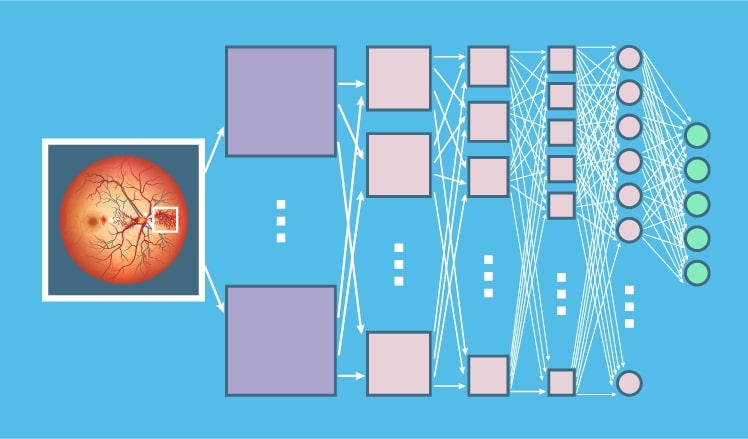

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

<h2>Table of Contents: </h2>

1. Recap of notebook 1 (Machine Learning + Neural Networks)    

2. Convolutional Neural Networks   
    a. General CNN structure  
    b. Convolution  
    c. Non-linear activation functions  
    d. Pooling layers  
    e. Final note  

3. What is Medical Imaging?  

4. Case study: classification of different skin cancers    
    a. What is a classification task?  
    b. Dataset and dataloaders  
    c. Why and how are CNNs able to solve this kind of problem  
    d. Analysing performance: Confusion matrix     

5. Case study: segmentation of brain tumours  
    a. What is a segmentation task?  
    b. Datasets and dataloaders  
    c. Why and how are CNNs able to solve this kind of problem  
    d. Analysing performance: Dice metrics  

<h3> <span style="color: #f28f2c;"> ~~~ Part 1. Recap of notebook 1 (Machine Learning + Neural Networks) ~~~ </span> </h2>

At the end of our previous notebook, we introduced the concept of Convolutional Neural Networks (CNNs) and more importantly, why CNNs are a more suitable tool for Monash AIM’s focus on medical imaging analysis in comparison to multi-layer perceptron (MLP) models. 

<h3> <span style="color: #f28f2c;"> ~~~ Part 2. Convolutional Neural Networks ~~~</span> </h3> 

<h4> <span style="color: #f28f2c;"> 2a. General CNN structure </span> </h4>

Just to re-emphasise the key advantages of CNNs once again, they allow us to:
  
- Use convolutional operations to learns features of an image in a hierarchical manner (from edges to eyes/ears/mouths to facial structures) whilst preserving the spatial information in an image, 
- Reduce computational loads during training, 
- Sensitively detect features in an accurate manner whilst remaining invariant to variations in the data being presented. 



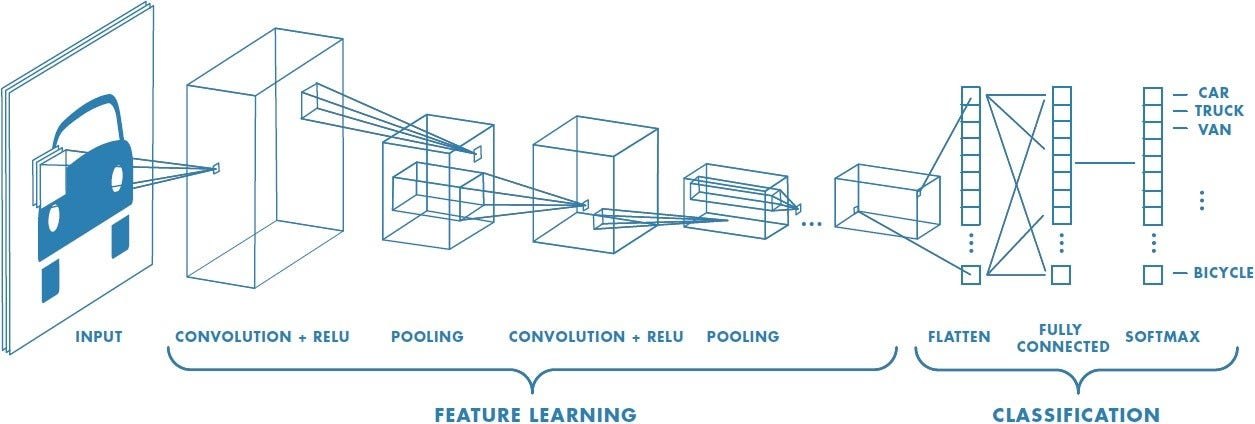

<i>Figure 1. General structure of a CNN</i>

Notice in figure 1 above that instead of individual neurons in the first convolutional layer being connected to each pixel in the input image (the case for an MLP), each neuron is responding to stimuli produced by a “patch” of pixels (also known as the <b>receptive field</b> of the neuron). In doing so, we reduce the number of neurons needed in each convolutional layer as well as capture the spatial and temporal dependencies of each pixel in an image by analysing not only themselves but also their interactions with surrounding pixels. 

Figure 2 below is a good visual representation of the convolution processes that occur to transition from the input image to the first convolutional feature in figure 1. Notice how the input image is a 5x5 matrix, however, the output is a 3x3 matrix.  


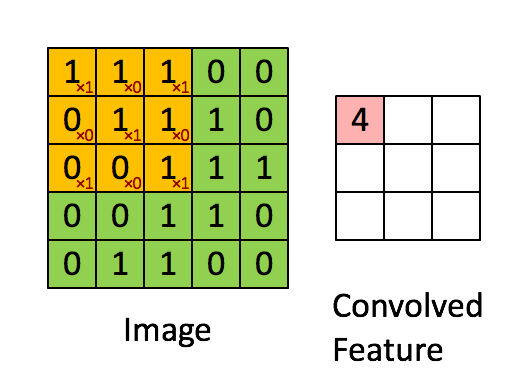

<i>Figure 2. Convolution of a filter over an image</i>



To demonstrate the correlation between figures 1 and 2: 
- The input image (car) in figure 1 = the green matrix in figure 2. 
- We slide a filter (smaller yellow matrix) over the input image to produce each of the pink elements in figure 2. In figure 1, the filter is the smaller patch overlayed over the input image, and the pink elements are the smaller squares on the convolutional “block” that the filter in figure 1 is projecting to. 
- After we convolve the filter over the entire input image, we obtain the first convolved feature e.g., edges. 
- Notice in figure 1 that the first convolutional feature undergoes various operations (e.g., non-linear activation functions, and pooling (to be discussed later)) before it is convolved again with another filter to produce the second convolutional feature e.g., eyes, ears, noses. 


To further emphasise the effectiveness of CNNs over MLPs, imagine if our data was not represented by a black and white image (single-channel) but more commonly, a colour/RGB image where we need to consider not only the height and width of the image but also the 3 different colour channels. Referring back to the main three advantages of CNNs: 
- Performing pixel-based analysis on every single pixel (MLPs) will be extremely computationally intensive as opposed to analysing “patches” of the image at a time (CNNs). 
- The consequences of flattening these 3D matrices into a 1D matrix are detrimental as all notions of spatial and temporal relations between pixels are destroyed. This is much easier to visualise when handling colour images where we need to look at pixels across all three channels simultaneously instead of pixels at a single channel. 


As previously stated, each convolutional operation - from the input to the first convolved feature to the second convolved feature and so on - is designed to capture an increasing hierarchy of features (from edges to facial features to facial structures). 

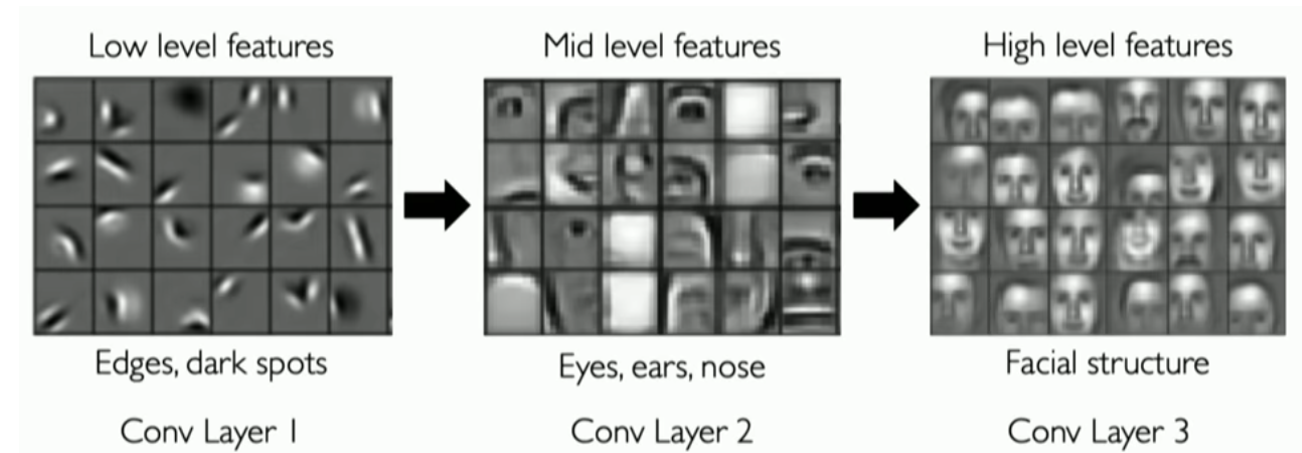

<i>Figure 3. Increasing complexity of features learned by a CNN at each convolutional layer. </i>


To give an analogy of CNNs: pretend you are a CNN model and you are tasked with memorizing the mapping of the Earth after being provided a reference image to learn from. 

<b>Approach 1: </b>make a list of all the countries in the world from the reference, memorizing the individual coordinates of each country, and then reconstruct the map using these coordinates. 
- This is effectively what an MLP is doing: looking at each country as an individual pixel of a bigger image. In the context of humans, this requires a large amount of memory as we need to record all the coordinates of each individual country (analogous to storing the weight/biases of all neurons). 
- Furthermore, what if we were given a second reference image to learn from but instead, this image was rotated by 90 degrees? As we have associated each country with a pixel value, this data variation may change the relative position of the countries.  

In summary, this approach is computationally intensive, is not invariant to data transformation, and does not look at the countries in relation to spatial and temporal dependencies. 

<b>Approach 2:</b> the more appropriate and effective approach we will consider is essentially what CNNs are doing: which cities are neighbouring each other to form states, which states are neighbouring each other to form countries, which countries are neighbouring each other to form the continents. 
- In this approach, we learn patches of “low-level” features (cities) and their relative connections with each other to form countries. 
- We can then move on to learn “mid-level” features (continents) by grouping countries. 
- And we can finally generate the final image (map) by grouping the continents. 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

Remember! We do not stop after we have reconstructed our first interpretation of the world mapping. Neural networks are like humans in that we can only grasp as much as we can after reading/listening to something once. 

<b>Take the analogy of learning how to dance.</b> 

During your very first rehearsal, you might just be trying to learn or recognise the individual moves. Naturally, you will have an easier time memorising simpler moves in comparison to moves that are harder to execute. During your second rehearsal, this may be when you decide to polish up on the harder moves. During your third rehearsal, you might be confident with the moves and instead, move on to synchronising your choreography with the music. And on your final rehearsal, you might move on to learning how to portray your own emotions/style. Notice how humans naturally learn things in a hierarchical manner. Between each rehearsal, you may relook over a recording of the routine and compare it to your own memory of the routine, identifying where things should be different and how you can change them before the next rehearsal. 

This is exactly what a neural network is doing and moreover, training is heavily dependent on the extent that we iterate through two processes:  

<b>Forward pass:</b> feeding our input image through the different hidden layers to generate the predicted output.  

<b>Backpropagation:</b> by comparing the predicted output to the theoretical output, we know which neurons/filters we need to attend and change (update its weights/biases) before trying to forward pass again.

Hence, our initial “prediction” of the mapping of the world will be improved by comparing its accuracy to the reference image (expected output) before going in the reverse direction - from the map to the continents to the countries - and refining the weights of the “patches”. This process of “learning” and "refining” is repeated for a specified number of times and ideally, the accuracy should improve as we train for more iterations (also referred to as <b>epochs</b>). 


<div style="background-color: #c04ae0; color: white; padding: 10px; border-radius: 5px;">

<span style="color: yellow"><i>Now that we know the fundamentals required for training, how can we personalise our training according to our task? </i></span>

To summarise the structure of a CNN so far: 
1. We have an input image that undergoes convolutional operations to generate a convolutional feature.
2. This convolutional feature continues to undergo further convolutional operations until a final convolutional feature map is generated. 
3. We then flatten this feature map and pass it through as a fully-connected layer for classification and comparison against the expected output. 

This model appears relatively consistent throughout different tasks, however, there are still parameters and features that need to be strategically applied/adjusted in order to improve the performance and accuracy of the model. Referring back to the figure 1, our convolutional hidden layers are comprised of three main components that we will address individually: 

1. Convolution
2. ReLU (or other non-linear activation functions)
3. Pooling layers

<h4> <span style="color: #f28f2c;"> 2b. Convolution </span> </h4>

When tuning the convolutional blocks in our neural network, there are four main variables of interest: 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Kernel size:</b> the size of the filter that we are sliding over the image.

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">


<b>Stride: </b> the number of pixels that we shift our convolutional filter. 

- Stride = 1: shift our filter by one pixel to the right 
- Stride = 2: shift our filter by two pixels to the right. 

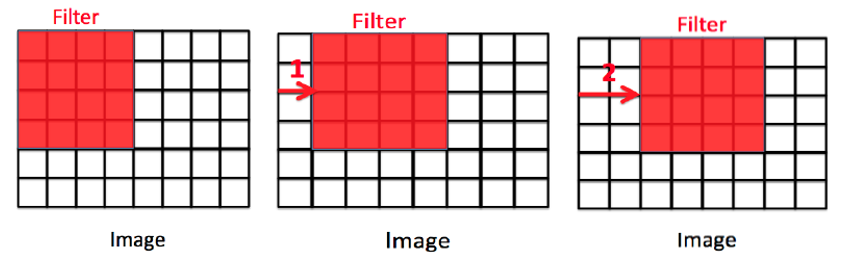

<i>Figure 4. Convolution of an image with different stride values </i>


<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Padding: </b> surrounds the input image with zeroes; used to address two issues of typical convolution (where padding is absent): 

1. Each convolutional operation results in an output feature map with a smaller resolution 
    - Padding attempts to preserve the size of the original image. 
2. During convolution, the elements of the image that are on the edge are not convolved as frequently as the elements in the centre due to the lower number of overlaps. 
    - In fact, the four corners of an image are only used once each (may have very distinguishing features that need to be detected). 
    - Padding in this sense “pushes” the edges towards the middle in order for them to be involved in more convolution operations. 

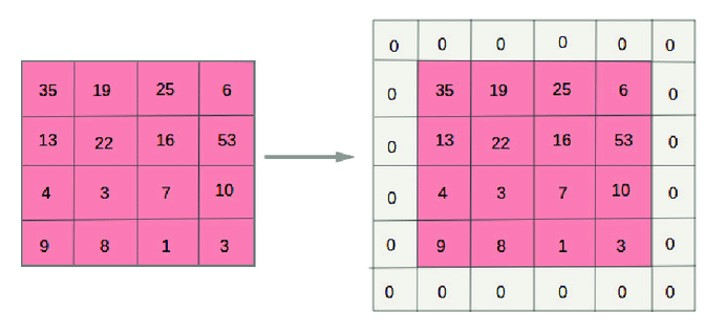

<i> Figure 5. Padding an input image with a degree of 1. </i>


<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Dilation: </b>inflates the kernel matrix by inserting spaces between the kernel elements.  

- This in turn increases the receptive field of the filter. Unlike padding where we are increasing the size of the input image, we are increasing the size of the filter by inserting zeros between the elements. 
- Covers more of the input image per convolutional operation. 
- Computationally efficient without any loss in output image resolution. 

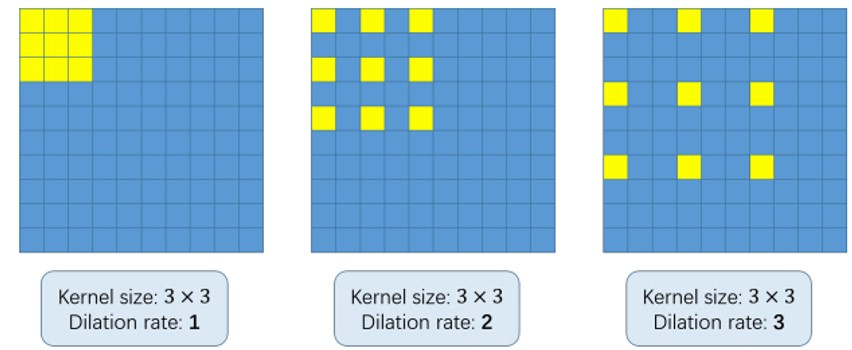

<i> Figure 6. Effect of increasing dilation rate on kernel size. </i> 


<h4> <span style="color: #f28f2c;"> 2c. Non-linear activation functions </span> </h4> 

We have previously discussed non-linear activation functions (such as ReLU, sigmoid, tanh, etc.,) in our first notebook. 

As a reminder to why we need non-linear activation functions, remember that we cannot simply stack linear combinations of hidden layers consecutively as these linear combinations can be represented by an equivalent single linear transformation. In other words, regardless of how many linear hidden layers we stack, they will all be seen as a single operation instead of multiple. In the case of MLPs, we were dealing with matrix multiplication; however, the sample principle applies for convolution. 

Two consecutive convolution operations (g_1 and g_2) being performed on a single input can be replaced with a single equivalent convolution operation such that: 
$$ f*g_1*g_2 = f * h$$
- where $h = g_1*g_2$

<div style="background-color: #c04ae0; color: white; padding: 10px; border-radius: 5px;">

Similar to linear transformations, we apply non-linear activations functions in between the hidden layers to not only resolve this issue, but also to have the ability to develop more complex relationships and patterns (non-linearities) that would not be possible with simple linear functions. 

Remember that to choose an appropriate activation function for our task, we need to consider the advantages and disadvantages of each activation function and the values that are outputted when our convolved features are passed through them. 

Refer back to notebook 1 for more detail on the different types of non-linear activation functions and their advantages/disadvantages. 

<h4> <span style="color: #f28f2c;"> 2d. Pooling layers </span></h4>

Pooling layers are generally applied after the convolved feature passes through a non-linear activation function with the purpose of reducing the complexity and computational cost of the neural network. Sometimes we do not need to store all of the information of the convolved feature and if this is the case, one may choose to apply a pooling layer to retain only the important information in an image. Two common pooling techniques used in such CNNs are: 

<table>
    <tr>
        <th> Technique </th>
        <th> Description </th> 
        <th> Image </th> 
    </tr>
    <tr> 
        <td> Max pooling </td>
        <td> takes the maximum of a region specified by the filter size. </td>
        <td> <img src="NB_3_Images/Figure7_Max_pooling.jpg"
        width=250
        height=250> </td>
    </tr>
    <tr> 
        <td> Average pooling </td> 
        <td> takes the average of a region specified by the filter size. </td>
        <td> <img src="NB_3_Images/Figure8_Average_pooling.jpg"
        width=250
        height=250> </td>
    </tr>
</table>

Notice how average pooling still considers the contributions of values smaller than the maximum; whereas, values other than the maximum are discarded during max pooling. Ask yourself: <i>do you need values other than the maximum? </i>


<h4> <span style="color: #f28f2c;"> 2e. Final note on CNNs </span> </h4>

Clearly, CNNs are much more advantageous than MLPs in handling medical imaging tasks as a result of their convolutional operations. Furthermore, we can tune different parameters and features of our hidden layers (convolutional operation characteristics, activation functions, pooling layers) to improve the overall performance threshold of our model. However, it doesn’t stop there! CNNs have continued to improve by progressively adding new hidden layers or features that ultimately led to deeper neural network models that we know and use today: 
- <b>VGG-Net:</b> basis of ground-breaking object recognition models 
- <b>GoogleNet: </b>incorporated global-average-pooling (GAP) layers and auxiliary classifiers  
- <b>ResNet:</b> comprised of residual units that allow deep layers to directly learn from shallower layers 


<h3> <span style="color: #f28f2c;"> ~~~ Part 3. What is Medical Imaging? ~~~</span></h3>


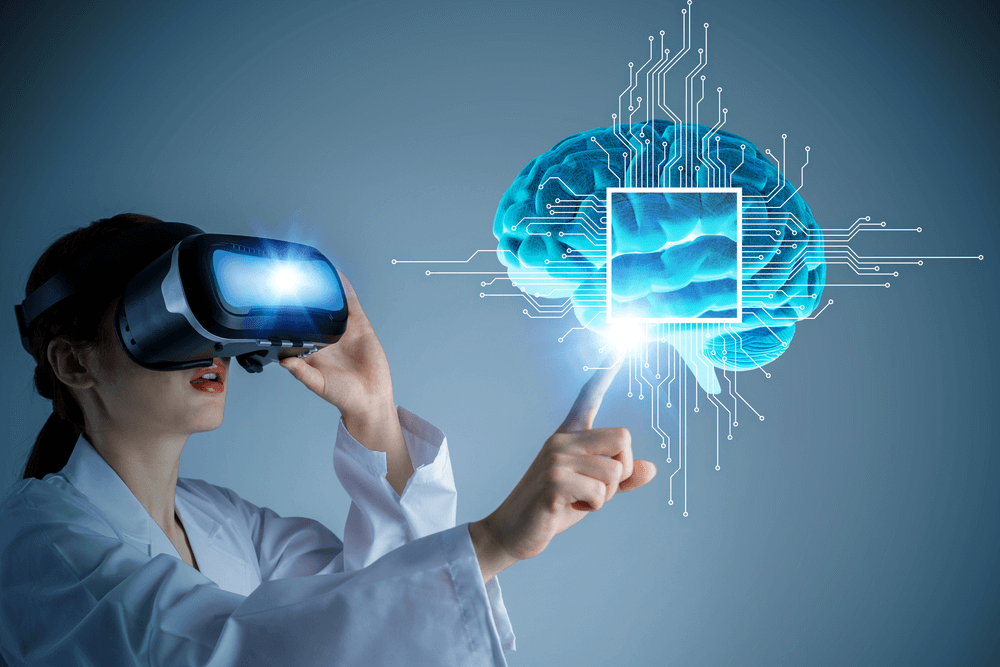

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">


According to the US Food and Drug Administration (FDA), medical imaging refers to:
<center><i><span style="color: yellow;">"several different technologies that are used to view the human body in order to diagnose, monitor, or treat medical conditions”.</span></i></center>

Medical imaging procedures provide doctors with a means of diagnosing and treating diseases/injuries in their patients in a non-invasive and less costly manner. There are a vast number of medical imaging technologies available; however, different technologies will be more suited for different tasks due to the type  of information presented and how it is obtained. Some examples of when you would need to use medical imaging include: 
- Detecting obstructions to blood flow 
- Determining if a tumour needs to be treated/removed
- Determining if surgical procedures need to be performed e.g., joint replacements, stents, catheters. 


The table below summarises 5 different types of imaging techniques; however, we have also provided a separate Medical Imaging notebook that discusses each technique in greater detail for your own interest:  
| Imaging technique | Description | 
|-------------------|-------------|
| X-ray | uses ionizing radiation that passes through the body to capture images of bones, soft tissue, etc. |
| Computed Tomography (CT) | uses a combination of X-rays and computer processing to create cross-sectional images of the body that highlight the bones, blood vessels, and soft tissues. |
| Magnetic Resonance Imaging (MRI) | uses magnetic field and radio waves to generate high resolution 2D and 3D images of a patient’s body | 
| Positron Emission Tompgraphy (PET) | relies on capturing emissions from radioactive material (radiopharmaceuticals) that have been injected into patients to assess cancers, neurological and cardiovascular diseases. |
| Echocardiography | uses soundwaves to show how blood flows through the heart and heart valves |


We believe that through the development of AI-powered image processing and CNN models, the diagnosis of medical conditions not only becomes automated, but also has the potential to be more efficient, precise, and inexpensive than traditional manual image analysis procedures. In the following sections, we will walk through how CNNs can be used to address two real-world medical contexts: 
1.	The classification of different skin cancers 
2.	The segmentation of brain tumours 

<h3><span style="color: #f28f2c;"> ~~~ Part 4. Case study: classification of different skin cancers ~~~ </span></h3>

<h4><span style="color: #f28f2c;"> 4a. What is a classification task? </span></h4>

If dermatologists suspect a patient to have skin cancer, they inspect the skin on the region of concern using a dermaoscope, which is like a magnifying glass to check what features the spots or dots on the skin have. If they find features that are indicative of cancerous skin, they will order a skin biopsy for the patient to further investigate and validate their deduction before diagnosing the patient with skin cancer [1].

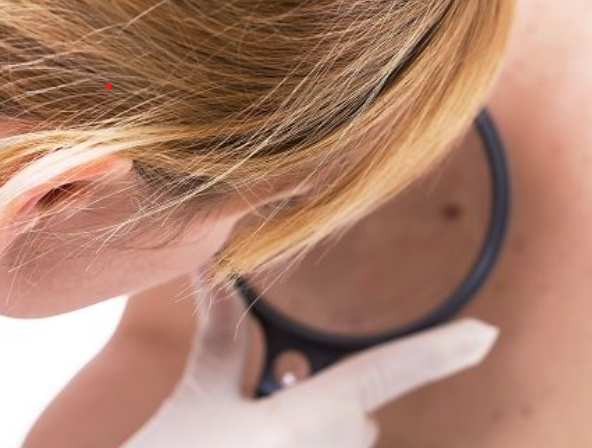

A classification neural network aims to perform the same task that the dermatologist is performing: to analyse features from an image of a potentially cancerous region of skin and deduce from this analysis whether the patient is healthy or ill. If the model is trained to be accurate enough, it may even be adopted as a suggestion tool for such health professionals. Characteristic features of skin cancers depicted in the image below can be used as categories for the classification neural network model to choose from, and variations or combinations of images with these types of image features can be used to train the neural network model so that if real patient skin images are fed to the model, it can correctly classify whether the skin has cancerous features similar to the ones that it has learned during training.

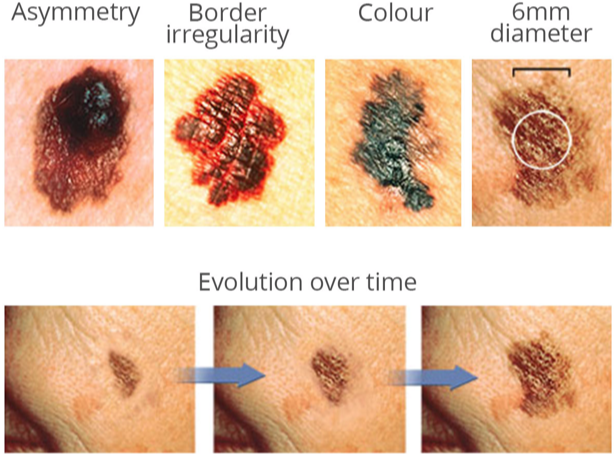

# References:
1.“How to Detect Skin Cancer,” Roswell Park Comprehensive Cancer Center. https://www.roswellpark.org/cancertalk/201907/how-detect-skin-cancer
‌

<h4><span style="color: #f28f2c;"> 4b. Datasets and DataLoaders </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

In section 3.1a of our previous notebook on machine learning, we introduced the concept of <b>datasets: a collection of data that is used for training, evaluating, and testing a machine learning model. </b>

In the context of medical imaging, the dataset is essentially the medical images that we are feeding into our neural networks. As we are currently addressing the classification of different skin cancers, we will be analysing the <b>MNIST: HAM10000 dataset</b> [2] which is commonly used to train neural networks in an attempt to automate the diagnosis of pigmented skin lesions from multi-source dermatoscopic images. The figure below shows the format of our data which shows 7 columns (labels); however, we are mainly interested in the image_id and dx columns which correspond to the image file and respective skin cancer diagnosed. 

Figure 1. Format of Skin Cancer MNIST:10000 dataset.


Generally, our dataset is divided into three main groups: 
- **Training data:** the sample of data used to train/fit the model; determining the weights and biases of the neurons 
- **Validation data:** the sample of data used to evaluate a given model while tuning the model’s hyperparameters. The model occasionally sees this data but never does it learn from it. 
- **Test data:** once the model is completely trained using the training and validation data sets, we provide the model with the final batch of images to evaluate its performance. 

**Example:** during many Kaggle competitions where participants are provided with datasets to train neural network models to perform certain task, the training and validation datasets are provided initially for competitors to develop their neural networks; however, the actual test dataset is only provided when the competition is about to close to decide the winner. 

A common split for training and testing data is usually 80:20, the remaining training data being further divided into training and validation portions according to the developer's preferences. 


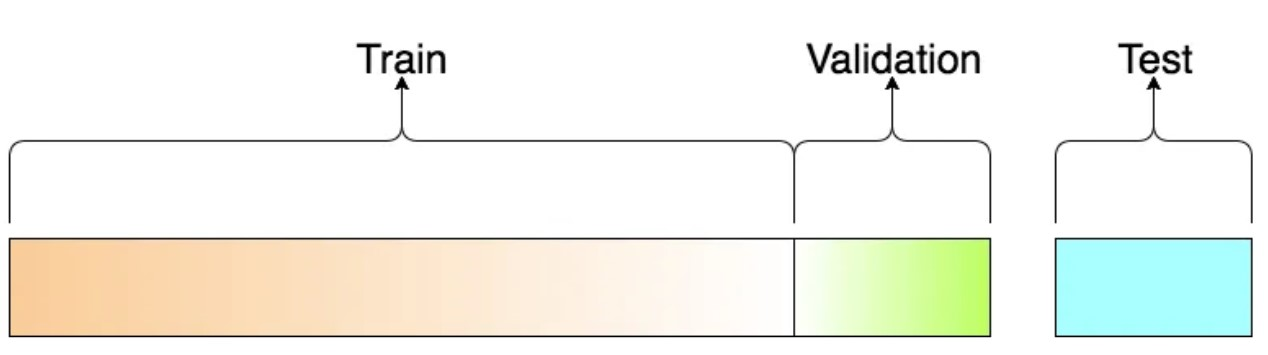

<i>Figure 7. Splitting the dataset into training, validation, and test sets. [1]</i>



Now that we have our training, validation, and testing data splits, we can feed each into our neural network one after another. Before we do this though, PyTorch provides us with essentially a class model that allows us to improve the simplicity and efficiency of training called a <b>DataLoader</b>. 

One approach when training a neural network may be to feed each individual image of the training dataset; however, this may not always be ideal when handling very large datasets. Remember that our Skin Cancer MNIST:HAM10000 dataset contains 10000 images. 

Instead, we can utilize the DataLoader class on our dataset to <b>train batches of several sample images</b> (similar concept to how we use convolution to analyse multiple pixels at once instead of individual pixels). Not only does this improve the efficiency/speed of training, but the quality of training is also generalized as multiple images are being analysed at once. 

Factors to take into consideration when designing DataLoaders include: 
- **Batch size:** the number of sample images in each batch 
- **Shuffling:** shuffles the entire dataset to ensure the batches are not the same across training cycles/epochs
- **Data augmentation:** manually introduces more variance to the data to improve robustness e.g., rotation, reflection, zoom/cropping, etc. 

The snippet of code below walks through the stages discussed in this section: 


<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

Summary of this section: 
- Source the dataset that will be used for your CNN model. 
    - How many images are in the dataset? What are the dimensions of each image? 
    - How many labels (i.e., different skin cancers) have been classified? 
- Split your dataset into training, validation, and testing subsets 
- Wrap your datasets with a DataLoader to access batch-training for more efficient and robust training 


<h4><span style="color: #f28f2c;"> 4c. Why and how are CNNS able to solve this kind of problem?  </span></h4>

Recall that our main goal with CNNs is to learn features of an image in a hierarchical manner e.g., from edges to eyes/nose/mouth to facial expressions. Hence, CNNs can be used in our skin cancer classification problem to learn and recognise features that are associated with skin lesions to deduce whether a patient is diagnosed with a specific skin cancer condition. Once we have split our MNIST:HAM10000 dataset into training, validation, and testing subsets, we can wrap each subset with a DataLoader to create batches that will be fed into our model. 

As each batch is passed through the progressive convolutional layers, the model is generating weights and biases for each neuron before making a prediction i.e., if the patient is healthy or diagnosed with a specific skin cancer. Fantastic, our model has made a prediction; however, how does it actually learn? It needs to compare its predicted output to the theoretical output; only then can it reflect on its mistakes and improve its accuracy by 'backpropagating' to update its weights and biases accordingly before forward-passing again with the model's newly updated weights and biases. As the number of training cycles increase, we expect the model to progressively learn more complex, refined, and unique features that are closely associated with specific skin lesions, improving its ability to accurately diagnose numerous patients. 

To summarise, skin cancer classification can be successfully performed by CNN models that are designed to:  
1. feed an image/batch through the individual convolutional layers of the model 
2. generate a prediction of the possible diagnosis 
3. compare the prediction to the theoretical output 
4. update the weights and biases of the neurons accordingly 
5. repeate forward-pass and backpropagation procedures for the specified number of training cycles to further refine the model's weights and biases

As the number of training cycles increase, the weight and biases of the neurons will be progressively refined and hopefully, the model will be able to make accurate predictions when we feed the testing dataset into the model. 


<h4><span style="color: #f28f2c;"> 4d. Analysing performance: confusion matrix </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

After we have ran our classification algorithm we have to ask "how accurate were we?" The most basic measurement of accuracy is measuring the amount of correct classifications against incorrect ones. This approach works but lacks detail that may be helpful in improving our classification algorithm. A better strategy is using a **confusion matrix** which gives extra detail on our accuracy. A confusion matrix splits our accuracy into four categories for binary classification problems, those are:
- **True Positives** ($TP$): cases where we correctly diagnose a positive case (infected patient)
- **True Negatives** ($TN$): cases where we correctly diagnose a negative case (healthy patient)
- **False Negatives** ($FN$): cases where we incorrectly diagnose a negative case as positive (infected patient mistakened for healthy)
- **False Positives** ($FP$): cases where we incorrectly diagnose a positive case as negative (healthy patient mistakened for infected)

|          | Positive | Negative |
| -------- | -------- | -------- |
| Positive | $TP$     | $FP$     |
| Negative | $FN$     | $TN$     |

Using the following metrics, we are able to compute the following values: 


| Metric                    | Equation                     | Description                                        |
| ------------------------- | ---------------------------- | -------------------------------------------------- |
| Sensitivity               | $\frac {TP}{TP+FN}$          | measures how often the prediction is correct       |
| Specificity               | $\frac {TN}{TN+FP}$          | measures when it is actually negative              |
| Precision                 | $\frac {TP}{TP+FP}$          | measures when a positive value is correct          |
| Negative predictive value | $\frac {TN}{TN+FN}$          | measures negative prediction                       |
| Accuracy                  | $\frac {TP+TN}{TP+TN+FP+FN}$ | measures overall correctness                       |


For problems which aren't binary and have more cases, we can construct a larger table that represents each category in an $n\times n$ table. In this scenario the <b>columns represent the true class</b>, while the <b>rows represent the predicted class</b>. When in this higher-dimensionality, we look at the true positive/negatives and false positive/negatives by analysing a single classifier. When doing this we look at: 
- the row of the class as the false negatives
- the column of the class as the false positives 
- and the rest of the categories as true negatives. 

For example: we can depict the categories for the case where we are looking at Class B as:
|         | Class A | Class B | Class C | Class D |
| ------- | ------- | ------- | ------- | ------- |
| Class A | $TN$    | $FP$    | $TN$    | $TN$    |
| Class B | $FN$    | $TP$    | $FN$    | $FN$    |
| Class C | $TN$    | $FP$    | $TN$    | $TN$    |
| Class C | $TN$    | $FP$    | $TN$    | $TN$    |

Using a confusion matrix we are able to diagnose where our algorithm is failing in particular. They are additionally important in a medical context where we want to: 
- minimise false positives as to not incorrectly diagnose a disease when the patient is actually healthy
- minimise false negatives to ensure the patient is attended to

<h3><span style="color: #f28f2c;"> ~~~ Part 5. Case study: segmentation of brain tumours ~~~ </span> </h3>

<h4><span style="color: #f28f2c;"> 5a. What is a segmentation task? </span></h4>

Let’s take a step back to remember the reasons we train neural networks. In the context of image analysis, neural networks can be trained to perform: 
- **Image classification:** the model receives an input image and assigns a label to the entire image e.g., does this image show a car or a truck? 
    - i.e., “what” is the image showing? 
- **Object detection:** the next step after image classification where we not only label the image as a “car” but also localize and define the boundaries of the car with bounding boxes. 
    - i.e., “where” is this car in the image? 

Finally, we have image segmentation which addresses the flaws of both image classification and object detection. More specifically, object detection allows us to relatively determine the location of objects; however, what happens when we have objects in close proximity or worse, overlapping? Instead of dividing the image into foreground and background (as in object detection), we can use various techniques (e.g., colour, intensity, patterns) to group and label individual pixels into specific classes based on related activities. Ultimately, our goal is to create segmentation masks that outline the specific boundaries and shapes of each class located throughout the image. Before we discuss the different types of segmentation tasks, there are two loose terme that we need to be aware of that reflect on the specific categories that elements in the image may fall under: 
- **“Things”:** objects with characteristic shapes and defined instances (countable)
    - E.g., trees, people, cars
- **“Stuff”:** amorphously shaped and highly variable in size; not clearly defined or countable 
    - E.g., sky, water, beach
    - E.g., a blade of grass is treated the same as a field 

Knowing this, we will have an easier time distinguishing between the three different types of segmentation tasks depicted in the figure below: 

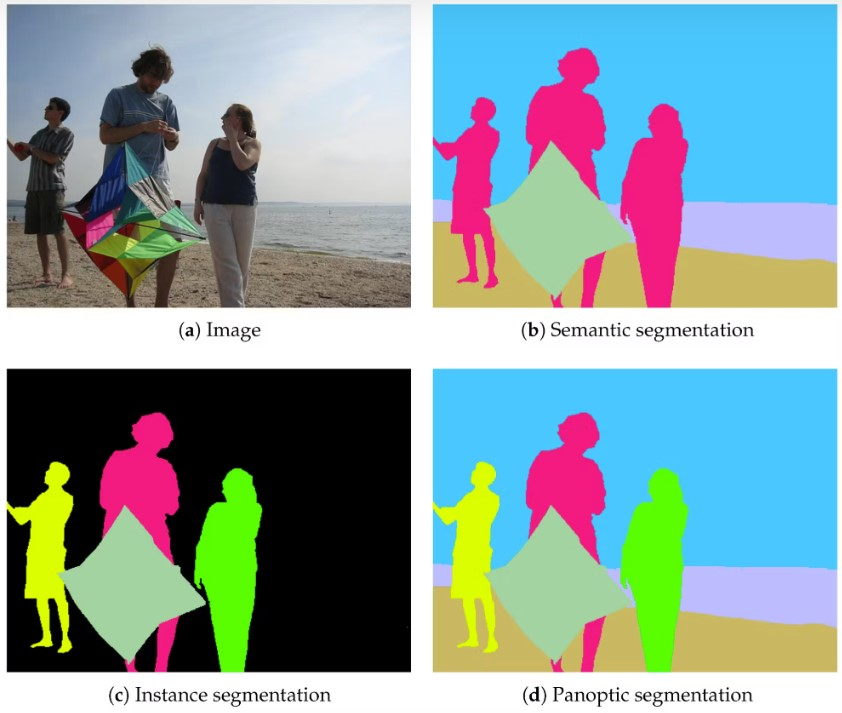

<i>Figure 8. Different types of segmentation tasks </i>


- **Semantic:** the simplest form of image segmentation where a label is assigned to every pixel based on its content 
    - Applications: geospatial surveys, retail inventory analysis
    - In the figure, we have given the same label to each instance of a person, as well as labelled the “stuff”. 
- **Instance:** the next step after semantic segmentation where individual instances of objects within the same class are distinguished. 
    - Applications: object counting, tracking, interaction analysis
    - Notice how we do not care about the “stuff” and only look at each instance of “things” (objects) 
- **Panoptic:** labels all pixels in an image, including both “stuff” (road, sky, grass) and “things” (people and animals). 
    - Applications: urban planning 
    - Essentially a combination of semantic and instance segmentation 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

Classification of different physiological diseases is a key area that AI can be adopted to improve the efficiency of traditional medical imaging analysis; but in some cases, we may want to identify which regions of the patient exhibit damaged or cancerous tissue. In this example, we look at brain tumours and more specifically, how we can use segmentation to not only distinguish healthy tissue from cancerous tissue, but also where this cancerous tissue is localised. 

To emphasise the significance of this, radiotherapy is the common standard used to treat patients with cancer cells. This surgery involves directing high doses of radiation at the cancer cells, damaging their DNA in an attempt to kill or slow their growth. Clearly, this procedure needs to be heavily controlled to ensure you are directing the radiation only at the cancer cells, but "how do you know where they are in the first place?" Hopefully you understand why we are introducing image segmentation now. 

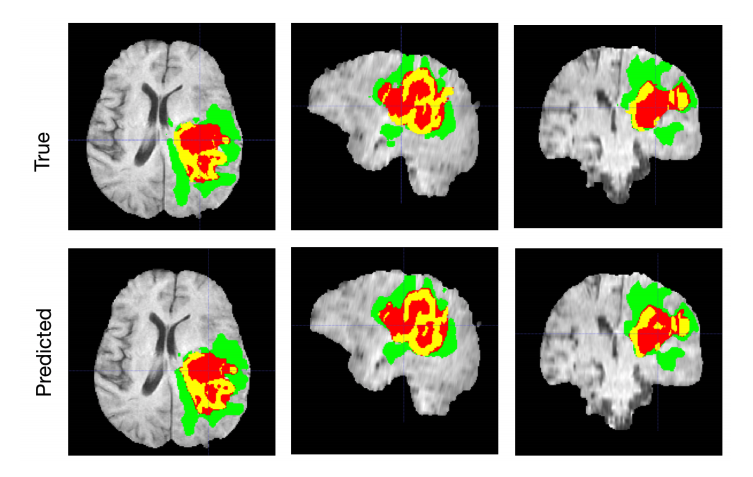

<h4><span style="color: #f28f2c;"> 5b. Datasets and DataLoaders </span></h4>

Now that we have a better understanding of brain tumours and segmentation tasks, our first step in training our neural network model is to actually obtain our data and prepare it for training, which is something we have introduced in the previous section on classification: 
- Sourcing the dataset for our brain tumour classification model and understanding its structure
- Splitting the dataset into training, validation, and test sets 
- Wrapping each dataset with a DataLoader to feed the data in batches rather than individual samples 

The dataset that we will be investigating in this section is the Brain Tumor MRI Dataset [3] containing 7023 MRI images of the human brain with four labels: 
- Glioma 
- Meningioma 
- No tumor
- Pituitary 

After downloading the dataset [3], we notice that the image files have already been divided into training and testing sets with 5217 and 1311 images respectively as shown in the figure below: 


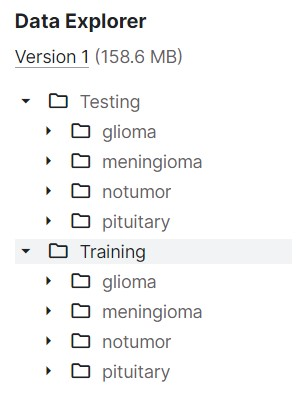

<i>Figure 9. Directory layout of the Brain Tumor MRI Dataset. Adapted from [3]. </i>


Hence, we only need to split our training set into two smaller sets: one for training and another for validation. Finally, we can continue to wrap each dataset with a DataLoader before feeding each set of batches into our neural network model: 


In [ ]:
# code to display a batch 

<h4><span style="color: #f28f2c;"> 5c. Why and how are CNNs able to solve this kind of problem?  </span></h4>

<h4><span style="color: #f28f2c;"> 5d. Analysing performance: dice metrics </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

To train and evaluate segmentation, we need a technique that is able to compare two masks. Enter the **Sorensen-Dice Coefficient**, commonly called the "dice score" or "dice metric". This score is used to quantify the similarity between sets. Given two sets, $X$ and $Y$, we can simply compute the score using the following equation:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$


From a certain perspective, this is similar to how we use a confusion matrix to measure the similarity between sets. For a binary segmentation where there are only two classes, we are able to view $X$ as the true case, and $Y$ as the predicted mask. From this, we are able to compute the dice coefficient for any two masks as:

$$D(Y)=\frac{2\cdot\sum_{y_{true}\in Y_{true}, y_{pred}\in Y_{pred}}(y_{pred}\cdot y_{pred})}{\sum_{y_{true}\in Y_{true}}(y_{true})+\sum_{y_{pred}\In Y_{pred}}(y_{pred})}$$

$$D(Y)=\frac{2\cdot\sum_{y_{true}\cap Y_{true}, y_{pred}\cap Y_{pred}}(y_{pred}\cdot y_{pred})}{\sum_{y_{true}\cap Y_{true}}(y_{true})+\sum_{y_{pred}\cap Y_{pred}}(y_{pred})}$$


For more advanced problems, it is common to have multiple classes. In this circumstance, we can only calculate the dice coefficient for a single class; however, we would calculate the dice coefficient for individual masks by repeating the equation above for each $Y_i$ if our problem involved multiple classes. To compute this into a single value, we can find the mean score:
$$D_{net}=\frac{1}{C}\sum_{i=1}^CD(Y_i)$$

A dice score is able to provide us with an easy way to express how accurate a segmentation is, with it being the most common validation function within medical imaging. It is also commonly used as a training function.
